You are to apply the following techniques to mine this data set:

Association Rules, 
Decision Tree Classification, 
Naive Bayes Classification, 
kmeans and dbscan clustering
Also, you are to use Principle Component Analysis to reduce the number of attributes (aka features).  

Please answer the following questions:

What can you deduce from the data set?   (in other words, what attribute values are indicative of "success")
Which mining techniques yielded the best results for what? How do you define "best results"? Please included tables and/or graphs to justify your statements about which are best.
How useful was Principle Component Analysis?   For what number of components did you get the "best results".  Please include tables and/or graphs to justify your statement.

In [218]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
from csv import reader
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import *
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import *
import seaborn as sns

In [236]:
pd.set_option('display.max_columns', None)
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.options.display.width = 0   # automatically ajust to window length

data = pd.read_csv('bank-full.csv')

df = data.copy() #for association rules
df2 = data.copy() # for classifiers
#df3 = data.copy() #for clustering
#df4 = data.copy() #forDBScan
#df5 = data.copy() #for PCA

In [237]:
print("\n\nOriginal data set:")
df.head(10)

#df.sort_values(by=['y'], ascending=False)



Original data set:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Association Rules (use classified data)

In [238]:
df = df.drop('pdays', axis=1)

for index, row in df.iterrows():
    if row['balance'] < 0:
        row['balance'] = 'inDebt'
    else:
        row['balance'] = 'notInDebt'

In [239]:
df.loc[(df['balance'] >= 10000), 'balanceSummary'] = 'veryPositive'
df.loc[((df['balance'] < 0) & (df['balance'] >= -10000)), 'balanceSummary'] = 'negative'
df.loc[((df['balance'] < 10000) & (df['balance'] >= 0)), 'balanceSummary'] = 'positive'
df.loc[df['balance'] < -500, 'balanceSummary'] = 'veryNegative'

df.loc[((df['age'] < 25) & (df['age'] >= 0)), 'ageBand'] = '0-25'
df.loc[((df['age'] < 30) & (df['age'] >= 25)), 'ageBand'] = '25-30'
df.loc[((df['age'] < 40) & (df['age'] >= 30)), 'ageBand'] = '30-40'
df.loc[((df['age'] < 50) & (df['age'] >= 40)), 'ageBand'] = '40-50'
df.loc[((df['age'] < 120) & (df['age'] >= 50)), 'ageBand'] = '50-120'

df.loc[(df['default'] == 'no'), 'defaultValue'] = 'defaultNo'
df.loc[(df['default'] == 'yes'), 'defaultValue'] = 'defaultYes'
df.loc[(df['housing'] == 'no'), 'housingVal'] = 'houseNo'
df.loc[(df['housing'] == 'yes'), 'housingVal'] = 'houseYes'
df.loc[(df['loan'] == 'no'), 'loanVal'] = 'loanNo'
df.loc[(df['loan'] == 'yes'), 'loanVal'] = 'loanYes'

df = df.rename(columns={'y': 'Subscribed'})

df = df.drop(['age', 'day', 'duration', 'balance', 'campaign', 'previous', 'default', 'housing', 'loan'], axis=1)

df.to_csv('outfile.csv',index = False )

df.head(10)

,job,marital,education,contact,month,poutcome,Subscribed,balanceSummary,ageBand,defaultValue,housingVal,loanVal
0,management,married,tertiary,unknown,may,unknown,no,positive,50-120,defaultNo,houseYes,loanNo
1,technician,single,secondary,unknown,may,unknown,no,positive,40-50,defaultNo,houseYes,loanNo
2,entrepreneur,married,secondary,unknown,may,unknown,no,positive,30-40,defaultNo,houseYes,loanYes
3,blue-collar,married,unknown,unknown,may,unknown,no,positive,40-50,defaultNo,houseYes,loanNo
4,unknown,single,unknown,unknown,may,unknown,no,positive,30-40,defaultNo,houseNo,loanNo
5,management,married,tertiary,unknown,may,unknown,no,positive,30-40,defaultNo,houseYes,loanNo
6,management,single,tertiary,unknown,may,unknown,no,positive,25-30,defaultNo,houseYes,loanYes
7,entrepreneur,divorced,tertiary,unknown,may,unknown,no,positive,40-50,defaultYes,houseYes,loanNo
8,retired,married,primary,unknown,may,unknown,no,positive,50-120,defaultNo,houseYes,loanNo
9,technician,single,secondary,unknown,may,unknown,no,positive,40-50,defaultNo,houseYes,loanNo


In [240]:
file = []
with open('outfile.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        file.append(row)

In [241]:
te = TransactionEncoder()
te_ary = te.fit(file).transform(file)

# convert into a data fram for convience and to pass into apriori
encoded_df = pd.DataFrame(te_ary,columns = te.columns_)

# Call apriori to find frequent itemsets with min_support = 30%
freq_items = apriori(encoded_df,min_support=0.3,use_colnames=True)

# add a column to freq_items that contains the number of items in the itemset
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

# now mine the rules by calling association_rules
print("\n\nThe Association rules:")
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
# print(type(rules))

# rename columns "antecedents support" to "antsup" and "consequents support" to "consup" so print nicer table
rules.columns = [ 'antecedents', 'consequents', 'antsup', 'consup', 'support', 'confidence', 'lift', 'leverage', 'conviction']
# print(rules.columns)
# print( rules[ ["antecedents","consequents","support","confidence","lift"] ] )
# print( rules[ ["antecedents","antsup","consequents","consup","support","confidence","lift"] ] )
rules[["antecedents","consequents","antsup","consup","support","confidence","lift"]].sort_values('support', ascending=False).head(10)





The Association rules:


,antecedents,consequents,antsup,consup,support,confidence,lift
32,(defaultNo),(positive),0.981952,0.898346,0.890073,0.906433,1.009003
31,(positive),(defaultNo),0.898346,0.981952,0.890073,0.990792,1.009003
30,(defaultNo),(no),0.981952,0.882996,0.866120,0.882039,0.998916
29,(no),(defaultNo),0.882996,0.981952,0.866120,0.980888,0.998916
25,(defaultNo),(loanNo),0.981952,0.839755,0.828386,0.843612,1.004593
26,(loanNo),(defaultNo),0.839755,0.981952,0.828386,0.986462,1.004593
35,(unknown),(defaultNo),0.826528,0.981952,0.809741,0.979689,0.997696
36,(defaultNo),(unknown),0.981952,0.826528,0.809741,0.824624,0.997696
71,(no),(positive),0.882996,0.898346,0.788994,0.893542,0.994653
70,(positive),(no),0.898346,0.882996,0.788994,0.878275,0.994653


# Classifications & PCA

In [242]:
# change all non-numeric into category data
df2['job'] = df2['job'].astype('category')
df2['job'] = df2['job'].cat.codes
df2['marital'] = df2['marital'].astype('category')
df2['marital'] = df2['marital'].cat.codes
df2['education'] = df2['education'].astype('category')
df2['education'] = df2['education'].cat.codes
df2['default'] = df2['default'].astype('category')
df2['default'] = df2['default'].cat.codes
df2['contact'] = df2['contact'].astype('category')
df2['contact'] = df2['contact'].cat.codes
df2['month'] = df2['month'].astype('category')
df2['month'] = df2['month'].cat.codes
df2['poutcome'] = df2['poutcome'].astype('category')
df2['poutcome'] = df2['poutcome'].cat.codes
df2['housing'] = df2['housing'].astype('category')
df2['housing'] = df2['housing'].cat.codes
df2['loan'] = df2['loan'].astype('category')
df2['loan'] = df2['loan'].cat.codes
df2['y'] = df2['y'].astype('category')
df2['y'] = df2['y'].cat.codes

df2 = df2.drop('pdays',axis=1)


df2['balance'] = (df2['balance'] - df2['balance'].min()) / ( df2['balance'].max() - df2['balance'].min() )

In [243]:
print("\n\nAfter converting to numeric, dropping pdays, and normalizing balance: (this provides catergorical data for decision tree and NB analysis)")
df2.head(10)





After converting to numeric, dropping pdays, and normalizing balance: (this provides catergorical data for decision tree and NB analysis)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,198,1,0,3,0
5,35,4,1,2,0,0.074901,1,0,2,5,8,139,1,0,3,0
6,28,4,2,2,0,0.076862,1,1,2,5,8,217,1,0,3,0
7,42,2,0,2,1,0.072822,1,0,2,5,8,380,1,0,3,0
8,58,5,1,0,0,0.073902,1,0,2,5,8,50,1,0,3,0
9,43,9,2,1,0,0.078187,1,0,2,5,8,55,1,0,3,0


In [244]:
df3 = df2.copy()
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,198,1,0,3,0


In [245]:
# now create X and Y for machine learning algoirthms

Y = df2['y'].values
df2 = df2.drop('y',axis=1)
X = df2

df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,58,4,1,2,0,0.092259,1,0,2,5,8,261,1,0,3
1,44,9,2,1,0,0.073067,1,0,2,5,8,151,1,0,3
2,33,2,1,1,0,0.072822,1,1,2,5,8,76,1,0,3
3,47,1,1,3,0,0.086476,1,0,2,5,8,92,1,0,3
4,33,11,2,3,0,0.072812,0,0,2,5,8,198,1,0,3


In [246]:
# partition into training and testing sets
x_train, x_test, y_train, y_test  = train_test_split( X, Y,  test_size=0.30, random_state=1)
print('len(x_train), len(y_train) = ' + str(len(x_train)) + ',' + str(len(y_train)) )
print('len(x_test), len(y_test) = ' + str(len(x_test)) + ',' + str(len(y_test)) )

len(x_train), len(y_train) = 31647,31647
len(x_test), len(y_test) = 13564,13564


### Principal Component Analysis

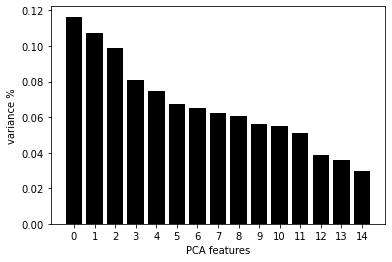

In [247]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df2)
# Create a PCA instance: pca
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

### Decision Tree 

In [249]:
# run decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
print(clf)
y_predicted = clf.predict(x_test)
print('\nconfusion_matrix from decision tree:')
print(confusion_matrix( y_test, y_predicted ) )
accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
print('accuracy = ' + str(accuracy))
print('recall = ' + str(recall))
print('precision = ' + str(precision))

DecisionTreeClassifier()

confusion_matrix from decision tree:
[[11084   929]
 [  839   712]]
accuracy = 0.8696549690356827
recall = 0.4590586718246293
precision = 0.43388177940280315


In [250]:
df3.loc[((df3['age'] < 25) & (df3['age'] >= 0)), 'ageBand'] = '0-25'
df3.loc[((df3['age'] < 30) & (df3['age'] >= 25)), 'ageBand'] = '25-30'
df3.loc[((df3['age'] < 40) & (df3['age'] >= 30)), 'ageBand'] = '30-40'
df3.loc[((df3['age'] < 50) & (df3['age'] >= 40)), 'ageBand'] = '40-50'
df3.loc[((df3['age'] < 120) & (df3['age'] >= 50)), 'ageBand'] = '50-120'

df3 = df3.drop('age', axis = 1)

le = preprocessing.LabelEncoder()
df3.ageBand = le.fit_transform(df3.ageBand)

y = df3['y'].values
X = df3.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)



In [251]:
df3.head(10)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,ageBand
0,4,1,2,0,0.092259,1,0,2,5,8,261,1,0,3,0,4
1,9,2,1,0,0.073067,1,0,2,5,8,151,1,0,3,0,3
2,2,1,1,0,0.072822,1,1,2,5,8,76,1,0,3,0,2
3,1,1,3,0,0.086476,1,0,2,5,8,92,1,0,3,0,3
4,11,2,3,0,0.072812,0,0,2,5,8,198,1,0,3,0,2
5,4,1,2,0,0.074901,1,0,2,5,8,139,1,0,3,0,2
6,4,2,2,0,0.076862,1,1,2,5,8,217,1,0,3,0,1
7,2,0,2,1,0.072822,1,0,2,5,8,380,1,0,3,0,3
8,5,1,0,0,0.073902,1,0,2,5,8,50,1,0,3,0,4
9,9,2,1,0,0.078187,1,0,2,5,8,55,1,0,3,0,3


In [ ]:
accuracies = []

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]: #exclude 'y'
    # create a pipeline that conducts a transformation (PCA) then Kmeans modelling
    reducer = Pipeline([('pca', PCA(n_components=i, random_state=0))])
    dt = Pipeline([('dt', tree.DecisionTreeClassifier())])

    # create pipeline for all steps and fit
    pipe = Pipeline([('preprocessor', reducer), ('model', dt)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(1, figsize=(8, 8))
sns.lineplot(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15], y=accuracies, linewidth=3, color='green', ax=ax)
ax.set_xlabel('Number of Attributes')
ax.set_ylabel('Model Accuracy')
plt.xticks(np.arange(min([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]), max([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15])+1, 1.0))
plt.suptitle('Accuracy for Decision Tree vs Number of Attributes', fontsize=24)
plt.grid()
plt.show()

In [255]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(tree.DecisionTreeClassifier(),
          k_features=6,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs1 = sfs1.fit(X_train, y_train)

print('\nRetained Features')
print(sfs1.k_feature_names_)
c1 = [x for x in df.columns if x not in sfs1.k_feature_names_]
print('\nDropped Features')
print(c1)


Retained Features
('job', 'balance', 'day', 'month', 'duration', 'campaign')

Dropped Features
['marital', 'education', 'contact', 'poutcome', 'Subscribed', 'balanceSummary', 'ageBand', 'defaultValue', 'housingVal', 'loanVal']


### Gaussian NB

In [57]:
# run GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
recall = recall_score(y_test, gausianNB_predicted )
precision = precision_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
print('recall = ' + str(recall))
print('precision = ' + str(precision))


confusion_matrix from Gaussian naive bayes:
[[731  59]
 [ 65  50]]
accuracy = 0.8629834254143647
recall = 0.43478260869565216
precision = 0.45871559633027525


In [ ]:
accuracies = []

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]:
    # create a pipeline that conducts a transformation (PCA) then Kmeans modelling
    reducer = Pipeline([('pca', PCA(n_components=i, random_state=42))])
    gnb = Pipeline([('gnb', GaussianNB())])

    # create pipeline for all steps and fit
    pipe = Pipeline([('preprocessor', reducer), ('model', gnb)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(1, figsize=(8, 8))
sns.lineplot(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15], y=accuracies, linewidth=3, color='blue', ax=ax)
ax.set_xlabel('Number of Attributes')
ax.set_ylabel('Model Accuracy')
plt.xticks(np.arange(min([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]), max([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15])+1, 1.0))
plt.suptitle('Accuracy for GaussianNB vs Number of Attributes', fontsize=24)
plt.grid()
plt.show()

In [257]:
sfs2 = SFS(GaussianNB(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs2 = sfs2.fit(X_train,y_train)

print('\nRetained Features')
print(sfs2.k_feature_names_)
c2 = [x for x in df.columns if x not in sfs2.k_feature_names_] #finding important columns from original dataframe
print('\nDropped Features')
print(c2)


Retained Features
('job', 'marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'poutcome', 'ageBand')

Dropped Features
['Subscribed', 'balanceSummary', 'defaultValue', 'housingVal', 'loanVal']


# Clustering 

### KMeans

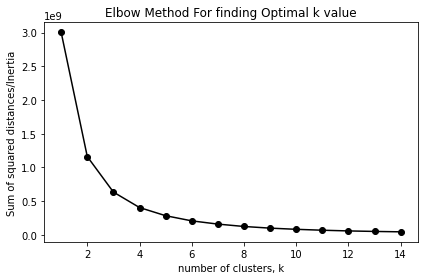

In [264]:
Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df3)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For finding Optimal k value')
plt.tight_layout()
plt.show()
#print("We notice the elbow point to be at k=4, which indicates that the change in value of the inertia is no longer significant")

In [265]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
y_pred = k_means.fit_predict(X)
labels = k_means.labels_

X["cluster"] = labels

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 32384 out of 45211 samples were correctly labeled.
Accuracy score: 0.72


### DBScan

In [290]:
df_DB = df3.filter(['default', 'balance'], axis=1)

#new = old.filter(['A','B','D'], axis=1)
df_DB.head()

,default,balance
0,0,0.092259
1,0,0.073067
2,0,0.072822
3,0,0.086476
4,0,0.072812


In [ ]:
db = DBSCAN(eps=0.2, min_samples=20).fit(df_DB)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(df_DB, labels))

Sources: Class Notes/exercises 
https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

discussed with classmates Hamza C, Duncan F, Danny V and Andy T

